# Reading in data

In [147]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('/chicago-data-summary-inserted-v2.csv')
features.tail(3)

,Date,Day,Month,Year,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Unnamed: 17,Unnamed: 18
153,12/1/17,1,12,2017,140.240722,3.95,61366.08333,9486.65425,4.4,688567.1351,1098.860000,0.3550,164821.0000,0.0180,1699,1.94,210.373,NaN,NaN
154,1/1/18,1,1,2018,141.063547,4.03,61642.00000,9484.15800,5.0,691288.4170,1091.129167,0.3567,164696.6667,0.0177,671,1.96,211.957,NaN,NaN
155,3/1/05,1,3,2005,153.995417,5.93,40731.00000,9362.08000,6.2,471401.4910,1195.605000,0.4350,177440.0000,0.0170,4629,1.68,175.200,NaN,NaN


In [148]:
days = features['Day']
months = features['Month']
years = features['Year']

# Creating train and test sets

In [149]:
import numpy as np

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['House_Price_Index(S&P/Case-Shiller)'])
dates = np.array(features['Date'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('House_Price_Index(S&P/Case-Shiller)', axis = 1)
features= features.drop('Unnamed: 17', axis = 1)
features= features.drop('Unnamed: 18', axis = 1)
features= features.drop('Date', axis = 1)
features= features.drop('Day', axis = 1)
features= features.drop('Year', axis = 1)
features= features.drop('Month', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
#features[143][0]

In [150]:
#creating train and test sets
train_features = features[:143,:]
test_features = features[143:,:]
print(test_features)
train_labels = labels[:143]
test_labels = labels[143:]

[[4.17000000e+00 5.86069167e+04 9.51161675e+03 5.40000000e+00
  6.61354316e+05 1.10437667e+03 3.63000000e-01 1.64580333e+05
  2.03000000e-02 1.62300000e+03 1.92000000e+00 2.09346000e+02]
 [4.20000000e+00 5.88828333e+04 9.50912050e+03 4.70000000e+00
  6.64075598e+05 1.10382500e+03 3.64000000e-01 1.64638000e+05
  2.00000000e-02 1.16500000e+03 1.70000000e+00 2.09426000e+02]
 [4.05000000e+00 5.91587500e+04 9.50662425e+03 4.50000000e+00
  6.66796880e+05 1.10327333e+03 3.63700000e-01 1.64650000e+05
  1.93000000e-02 2.67100000e+03 1.37000000e+00 2.10220000e+02]
 [4.01000000e+00 5.94346667e+04 9.50412800e+03 4.40000000e+00
  6.69518162e+05 1.10272167e+03 3.63300000e-01 1.64662000e+05
  1.87000000e-02 1.20100000e+03 1.43000000e+00 2.09999000e+02]
 [3.90000000e+00 5.97105833e+04 9.50163175e+03 5.10000000e+00
  6.72239444e+05 1.10217000e+03 3.63000000e-01 1.64674000e+05
  1.80000000e-02 3.20700000e+03 1.43000000e+00 2.09434000e+02]
 [3.97000000e+00 5.99865000e+04 9.49913550e+03 5.10000000e+00
  6

In [151]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (143, 12)
Training Labels Shape: (143,)
Testing Features Shape: (13, 12)
Testing Labels Shape: (13,)


# Creating a random forest regressor, training, and testing it

In [152]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [153]:
#trying out a regressor with different hyperparameters
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1) 

In [154]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print(predictions)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print(test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2)) #omg wait that's not a lot of error I think

[135.93879499 136.17507399 136.1019544  136.13430736 135.92869673
 136.25870043 135.99276252 135.99400296 136.04956457 135.89527846
 135.95073232 136.0555543  154.81500864]
[138.1503006 138.3316803 138.2040744 138.1503594 138.1259414 138.3472114
 138.5462764 139.0017935 139.3753835 140.0427686 140.2407218 141.0635467
 153.9954167]
Mean Absolute Error: 2.76


In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') #woah that is quite accurate....

Accuracy: 98.02 %.


# Visualizing one decision tree

In [157]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [158]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 9


# Variable importance

In [159]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Mortgage_Rate (30 yers) Importance: 0.82
Variable: Percent_With_Severely_Delinquent_Debt Importance: 0.09
Variable: Unemployment_Rate    Importance: 0.03
Variable: Personal_Income      Importance: 0.01
Variable: Resident_Population  Importance: 0.01
Variable: GDP                  Importance: 0.01
Variable: Crime_Rate           Importance: 0.01
Variable: Percent_With_Mortgage_Debt Importance: 0.01
Variable: Median_Debt          Importance: 0.01
Variable: Economic_Conditions_Index Importance: 0.01
Variable: New_Structures       Importance: 0.0
Variable: CPI all items less shelter Importance: 0.0


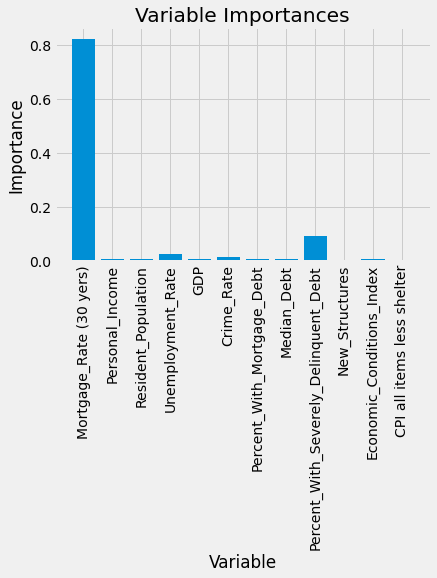

In [160]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [161]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('Mortgage_Rate (30 yers)'), feature_list.index('Percent_With_Severely_Delinquent_Debt')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.') #still seem like quite good results omg

Mean Absolute Error: 2.52
Accuracy: 98.19 %.


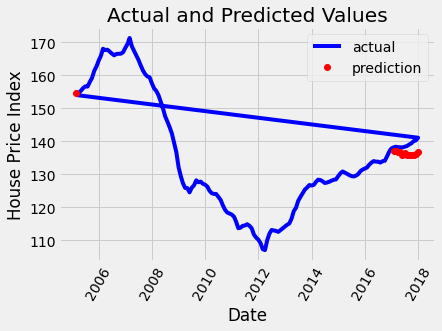

In [162]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of training values
m1 = months
d1 = days
y1 = years

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(y1, m1, d1)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
m2 = months[143:]
d2 = days[143:]
y2 = years[143:]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(y2, m2, d2)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('House Price Index'); plt.title('Actual and Predicted Values');